In [64]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [65]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AG_1.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [66]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	10
float64		column 2	5
float64		column 3	0
float64		column 4	0
float64		column 5	5
float64		column 6	5
float64		column 7	6
float64		column 8	6
float64		column 9	5
float64		column 10	0
float64		column 11	0
float64		column 12	5
float64		column 13	5
float64		column 14	15
float64		column 15	20
float64		column 16	0
float64		column 17	15
float64		column 18	25
float64		column 19	0
float64		column 20	0
float64		column 21	10
float64		column 22	25
float64		column 23	35
float64		column 24	25
float64		column 25	56
float64		column 26	106
float64		column 27	0
float64		column 28	101
float64		column 29	96
float64		column 30	121
float64		column 31	86
float64		column 32	125
float64		column 33	0
float64		column 34	161
float64		column 35	105
float64		column 36	131
float64		column 37	5
float64		column 38	25
float64		column 39	25
float64		column 40	140
float64		column 41	10
float64		column 42	35
float64		column 43	41
float64		column 44	31
float64		colu

In [67]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4587.000000,4592.000000,4597.000000,4597.000000,4592.000000,4592.000000,4591.000000,4591.000000,4592.000000,4597.000000,...,4572.000000,4522.000000,4567.000000,4556.000000,4587.000000,4552.000000,4502.000000,4517.000000,4521.000000,4512.000000
mean,0.104463,0.213003,0.280433,0.065482,0.312709,0.095804,0.114457,0.105485,0.089980,0.239621,...,0.032056,0.038989,0.139272,0.016990,0.269664,0.076317,0.043974,5.169072,49.855121,281.716977
std,0.305565,1.291705,0.504121,1.395757,0.673059,0.273706,0.391831,0.401479,0.278452,0.644997,...,0.286628,0.245483,0.271080,0.109754,0.816812,0.247005,0.432205,31.819197,128.138818,591.135931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.594000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.280000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.318000,0.053000,0.000000,3.706000,43.000000,267.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,2204.000000,15841.000000


<AxesSubplot:>

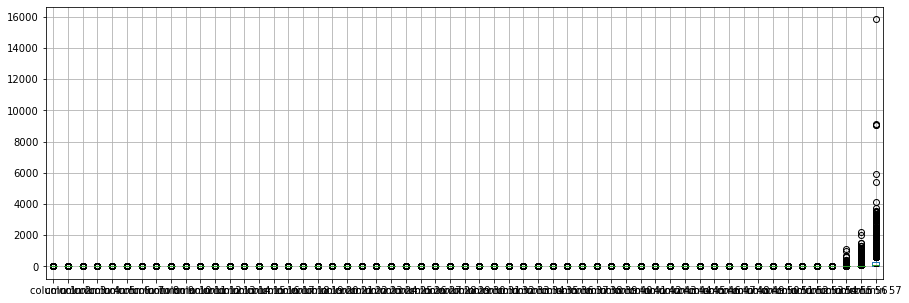

In [68]:
df.boxplot(return_type='axes', figsize=(15,5))

In [69]:
df.mean()

column 1       0.104463
column 2       0.213003
column 3       0.280433
column 4       0.065482
column 5       0.312709
column 6       0.095804
column 7       0.114457
column 8       0.105485
column 9       0.089980
column 10      0.239621
column 11      0.059876
column 12      0.542474
column 13      0.093935
column 14      0.058531
column 15      0.049336
column 16      0.249065
column 17      0.143025
column 18      0.185151
column 19      1.661710
column 20      0.085652
column 21      0.809845
column 22      0.120706
column 23      0.102091
column 24      0.094425
column 25      0.553206
column 26      0.264422
column 27      0.767973
column 28      0.125616
column 29      0.099080
column 30      0.103050
column 31      0.064301
column 32      0.046957
column 33      0.097313
column 34      0.048061
column 35      0.106518
column 36      0.097644
column 37      0.136363
column 38      0.013285
column 39      0.078819
column 40      0.064290
column 41      0.043667
column 42      0

In [70]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.016850,0.065186,0.013298,0.022967,0.058816,0.007798,-0.004283,0.106499,0.040423,...,-0.017897,-0.026588,-0.021480,-0.033484,0.057378,0.116577,-0.008667,0.044855,0.098116,0.093956
column 2,-0.016850,1.000000,-0.033670,-0.006924,-0.023884,-0.024847,0.003527,-0.016482,-0.003732,0.033080,...,-0.015803,-0.007384,-0.049939,-0.018420,-0.014478,-0.009929,0.002102,0.002009,0.002475,-0.023616
column 3,0.065186,-0.033670,1.000000,-0.020235,0.078079,0.086817,0.036735,0.012038,0.094237,0.032257,...,-0.026399,-0.033228,-0.016458,-0.034838,0.108578,0.087275,-0.002298,0.099705,0.170732,0.073435
column 4,0.013298,-0.006924,-0.020235,1.000000,0.003205,-0.010012,0.019756,0.010247,-0.002444,-0.004963,...,-0.001955,-0.000671,-0.012425,-0.007166,-0.003173,0.010775,-0.000299,0.005281,0.034248,0.022157
column 5,0.022967,-0.023884,0.078079,0.003205,1.000000,0.054214,0.147025,0.029452,0.021054,0.034699,...,-0.032188,-0.033223,-0.046370,-0.026422,0.025365,0.040819,0.001996,0.053844,0.083942,0.003245
column 6,0.058816,-0.024847,0.086817,-0.010012,0.054214,1.000000,0.061233,0.079755,0.118103,0.013664,...,-0.031769,-0.019158,-0.008853,-0.015289,0.063565,0.103860,0.018576,-0.009906,0.139002,0.085228
column 7,0.007798,0.003527,0.036735,0.019756,0.147025,0.061233,1.000000,0.044414,0.051003,0.056600,...,-0.031590,-0.033112,-0.052517,-0.027765,0.053391,0.071807,0.048182,0.041871,0.096120,-0.008542
column 8,-0.004283,-0.016482,0.012038,0.010247,0.029452,0.079755,0.044414,1.000000,0.105596,0.082984,...,-0.021289,-0.027470,-0.032693,-0.019525,0.031165,0.058047,-0.007491,0.011356,0.061837,0.041841
column 9,0.106499,-0.003732,0.094237,-0.002444,0.021054,0.118103,0.051003,0.105596,1.000000,0.131852,...,-0.027576,-0.015541,-0.031327,0.013562,0.044103,0.149119,0.000170,0.113043,0.291623,0.256044
column 10,0.040423,0.033080,0.032257,-0.004963,0.034699,0.013664,0.056600,0.082984,0.131852,1.000000,...,-0.016937,0.011801,0.003638,0.007859,0.036640,0.075650,0.045830,0.074528,0.163713,0.090737


In [71]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [72]:
imputer = md.Midas(layer_structure = [17,17+46,17+46+46,17+46+46+46,17+46+46,17+46,17], vae_layer = False, seed = 460)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 658.1605606344934
Epoch: 1 , loss: 656.036138926649
Epoch: 2 , loss: 653.6407694534142
Epoch: 3 , loss: 650.2089836040856
Epoch: 4 , loss: 657.8103833348079
Epoch: 5 , loss: 655.7703535764475
Epoch: 6 , loss: 651.941495782407
Epoch: 7 , loss: 654.1767086068928
Epoch: 8 , loss: 650.4002130488485
Epoch: 9 , loss: 647.5125854173189
Epoch: 10 , loss: 602.1049307314777
Epoch: 11 , loss: 527.5930515515264
Epoch: 12 , loss: 495.4787847273026
Epoch: 13 , loss: 477.0157016129444
Epoch: 14 , loss: 461.8717004064899
Epoch: 15 , loss: 458.47236697100595
Epoch: 16 , loss: 449.54716603348896
Epoch: 17 , loss: 455.31833699189826
Epoch: 18 , loss: 450.18903669829155
Epoch: 19 , loss: 438.686753675082
Epoch: 20 , loss: 437.6064887761239
Epoch: 21 , loss: 440.71112439358274
Epoch: 22 , loss: 443.15503333752997
Epoch: 23 , loss: 445.5613478285095
Epoch: 24 , loss: 445.4867567534231
Epoch: 25 , loss: 440.1422859750143
Epo

In [73]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [74]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [75]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [76]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [77]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [78]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [79]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

14717.43232849884

In [80]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [81]:
NRMS=numerator/denominator
NRMS


0.3101106159463479

In [82]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [83]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [84]:
imputations[-1].to_excel("Spam_AE_1(imp).xlsx", index=False, header=False)